<a href="https://colab.research.google.com/github/ahnjonghyunn/ABC/blob/main/1%EC%9D%BC%EC%B0%A8_%EB%84%A4%EC%9D%B4%EB%B2%84_%EC%96%B8%EB%A1%A0%EC%82%AC%EB%B3%84_%EB%9E%AD%ED%82%B9%EB%89%B4%EC%8A%A4_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#네이버 언론사별 랭킹뉴스 크롤링 및데이터시각화

##1 패키지

In [ ]:

!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

###패키지 임포트

In [ ]:
import pandas as pd
import datetime
from pytz import timezone

from urllib.request import urlopen
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')


##2 네이버 언론사별 랭킹뉴스 - 많이 본 뉴스 크롤링


In [ ]:
#1) 데이터 프레임 생성
data = pd.DataFrame(columns=['언론사명 ','순위','기사제목','기사링크','수집일자'])
#2) 네이버 언론사 별 랭킹 뉴스 url
url = 'https://news.naver.com/main/ranking/popularDay.naver'

# 3) url에 접속하여 html 가져오기
html= urlopen(url)

# 4)html 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser',from_encoding='UTF-8')


#5) 네이버 랭킹 정보가 들어있는 div class -> rankingnews_box 가져오기
div = soup.find_all('div', {'class':'rankingnews_box'})

#6) 네이버 랭킹 기사 제목, 언론사 등 데이터 크롤링
for index_div in range(0, len(div)):

  #언론사 추출
  strong = div[index_div].find('strong',{'class': 'rankingnews_name'})
  press = strong.text

  # 5개 순위 기사 정보 추출
  ul = div[index_div].find_all('ul',{'class': 'rankingnews_list'})

  for index_r in range(0, len(ul)):
    li= ul[index_r].find_all('li')

    for index_l in range(0, len(li)):
      try: #예외
        rank = li[index_l].find('em',{'class' : 'list_ranking_num'}).text #순위
        title = li[index_l].find('a').text #기사 제목
        link = li[index_l].find('a').attrs['href'] #기사 링크

        data = data.append({'언론사명' :press, '순위':rank, '기사제목':title, '기사링크':link,
                            '수집일자' : datetime.datetime.now(timezone('Asia/Seoul')).strftime('%Y-%m-%d %H:%M:%S')},
                            ignore_index=True)
      except:
        pass

      print('Complets of ' + rank + ' : ' + title)

print('-' * 20)
print(data)






Complets of 1 : [단독] "예산 허투루 쓰인다"더니…조성경 차관의 '수상한 식사'
Complets of 2 : 피 철철 쏟는데 대학병원까지 2시간…'30대 산모 사망' 추적
Complets of 3 : '이태원특별법' 거부권 무게 실리지만…확답 못하는 지도부
Complets of 4 : 고 이예람 중사 '사건 은폐' 대대장 무죄…어머니는 쓰러져
Complets of 5 : [르포] 외국인 노동자 '기댈 곳' 사라진다…"어디 가서 임금체불 묻나"
Complets of 1 : 프랑스 언론, 이선균 죽음에 "높은 도덕성 요구하는 한국"
Complets of 2 : 부산경찰청, 이재명 피습 '증거인멸' 의혹에 "사실 아냐"
Complets of 3 : 실손 믿고 1천만 원 전립선 결찰술…지급거부에 '공동소송'
Complets of 4 : ‘대한뉴스’ 목소리 주인공 김승한 아나운서 별세…향년 87세
Complets of 5 : [정치톡톡]"현근택에 또 당해"/ 지상욱 돌연 불출마 / 김용태의 쓴소리
Complets of 1 : 고지혈증 막으려면 밥에 ‘OO’ 넣으세요 [식탐]
Complets of 2 : "이재용도 탐냈는데…"  700만원 넘는 카메라, 결국 '몸값' 낮췄다
Complets of 3 : [단독] ‘수원은 무조건 탈환’ 정용진, 트레이더스 수원화서점 찾았다
Complets of 4 : “‘몸값 700억’ 손흥민 보다 긴장했다” 그라운드 밖 수호신…누군가 했더니
Complets of 5 : “박수홍만 법인카드 못 쓰게 했다…가족들이 더 써야 하니까”
Complets of 1 : 佛신문 "이선균 죽음 한국에 경종…일종의 청교도주의"
Complets of 2 : 삼성전자 "홍라희·이부진·이서현, 지분 2조1천691억원 처분"
Complets of 3 : 과거 해운대 태풍 피해 영상으로 생중계한 유튜버 재판행
Complets of 4 : '88올림픽·대한뉴스'의 그 목소리…김승한 아나운서 별세
Complets of 5 : 쥐 잡으려 밀폐된 거실에 살

In [ ]:
data.head()

,언론사명,순위,기사제목,기사링크,수집일자,언론사명
0,NaN,1,"[단독] ""예산 허투루 쓰인다""더니…조성경 차관의 '수상한 식사'",https://n.news.naver.com/article/437/000037535...,2024-01-15 22:52:38,JTBC
1,NaN,2,피 철철 쏟는데 대학병원까지 2시간…'30대 산모 사망' 추적,https://n.news.naver.com/article/437/000037536...,2024-01-15 22:52:38,JTBC
2,NaN,3,'이태원특별법' 거부권 무게 실리지만…확답 못하는 지도부,https://n.news.naver.com/article/437/000037535...,2024-01-15 22:52:38,JTBC
3,NaN,4,고 이예람 중사 '사건 은폐' 대대장 무죄…어머니는 쓰러져,https://n.news.naver.com/article/437/000037536...,2024-01-15 22:52:38,JTBC
4,NaN,5,"[르포] 외국인 노동자 '기댈 곳' 사라진다…""어디 가서 임금체불 묻나""",https://n.news.naver.com/article/437/000037536...,2024-01-15 22:52:38,JTBC


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언론사명    0 non-null      object
 1   순위      400 non-null    object
 2   기사제목    400 non-null    object
 3   기사링크    400 non-null    object
 4   수집일자    400 non-null    object
 5   언론사명    400 non-null    object
dtypes: object(6)
memory usage: 18.9+ KB


##3 크롤링한 데이터 **저장하기**

In [ ]:
data.to_csv('네이버랭킹뉴스_크롤링_많이본뉴스_20240115.csv', encoding='utf-8-sig',index = False)

##4 크롤링 데이터 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

import konlpy
from wordcloud import WordCloud

## 워드클라우드를 위한 전처리

In [ ]:
# 기사 제목만 text로 변환
text= ' '.join(li for li in data['기사제목'].astype(str))
text

'[단독] "예산 허투루 쓰인다"더니…조성경 차관의 \'수상한 식사\' 피 철철 쏟는데 대학병원까지 2시간…\'30대 산모 사망\' 추적 \'이태원특별법\' 거부권 무게 실리지만…확답 못하는 지도부 고 이예람 중사 \'사건 은폐\' 대대장 무죄…어머니는 쓰러져 [르포] 외국인 노동자 \'기댈 곳\' 사라진다…"어디 가서 임금체불 묻나" 프랑스 언론, 이선균 죽음에 "높은 도덕성 요구하는 한국" 부산경찰청, 이재명 피습 \'증거인멸\' 의혹에 "사실 아냐" 실손 믿고 1천만 원 전립선 결찰술…지급거부에 \'공동소송\' ‘대한뉴스’ 목소리 주인공 김승한 아나운서 별세…향년 87세 [정치톡톡]"현근택에 또 당해"/ 지상욱 돌연 불출마 / 김용태의 쓴소리 고지혈증 막으려면 밥에 ‘OO’ 넣으세요 [식탐] "이재용도 탐냈는데…"  700만원 넘는 카메라, 결국 \'몸값\' 낮췄다 [단독] ‘수원은 무조건 탈환’ 정용진, 트레이더스 수원화서점 찾았다 “‘몸값 700억’ 손흥민 보다 긴장했다” 그라운드 밖 수호신…누군가 했더니 “박수홍만 법인카드 못 쓰게 했다…가족들이 더 써야 하니까” 佛신문 "이선균 죽음 한국에 경종…일종의 청교도주의" 삼성전자 "홍라희·이부진·이서현, 지분 2조1천691억원 처분" 과거 해운대 태풍 피해 영상으로 생중계한 유튜버 재판행 \'88올림픽·대한뉴스\'의 그 목소리…김승한 아나운서 별세 쥐 잡으려 밀폐된 거실에 살충제 20캔 뿌렸다가 \'펑\' [단독] "결혼식이 비극이 됐습니다"…신혼부부의 눈물 외국어 안 배워도 \'프리토킹\'…"영어 선생님 어쩌나" 직격탄 \'심은하 남편\' 지상욱, 총선 불출마 선언…"尹정부 밀알 되겠다" 남성은 군대 vs 여성은 카페…AI가 그린 \'한국 남녀\' 알고보니 "소변이 콜라색" 깜짝…\'다이어트\' 30대 직장인에게 무슨 일이 [건강!톡] 모델인줄 알았는데…美 최고 미인에 뽑힌 여성, 직업보니 ‘깜짝’ 디올 입고 공사장에 뜬 용진이형…“2030 놀러오는 매장 만들어야” “공부만 잘해서는 못가겠네”…일반고보

### 워드 클라우드

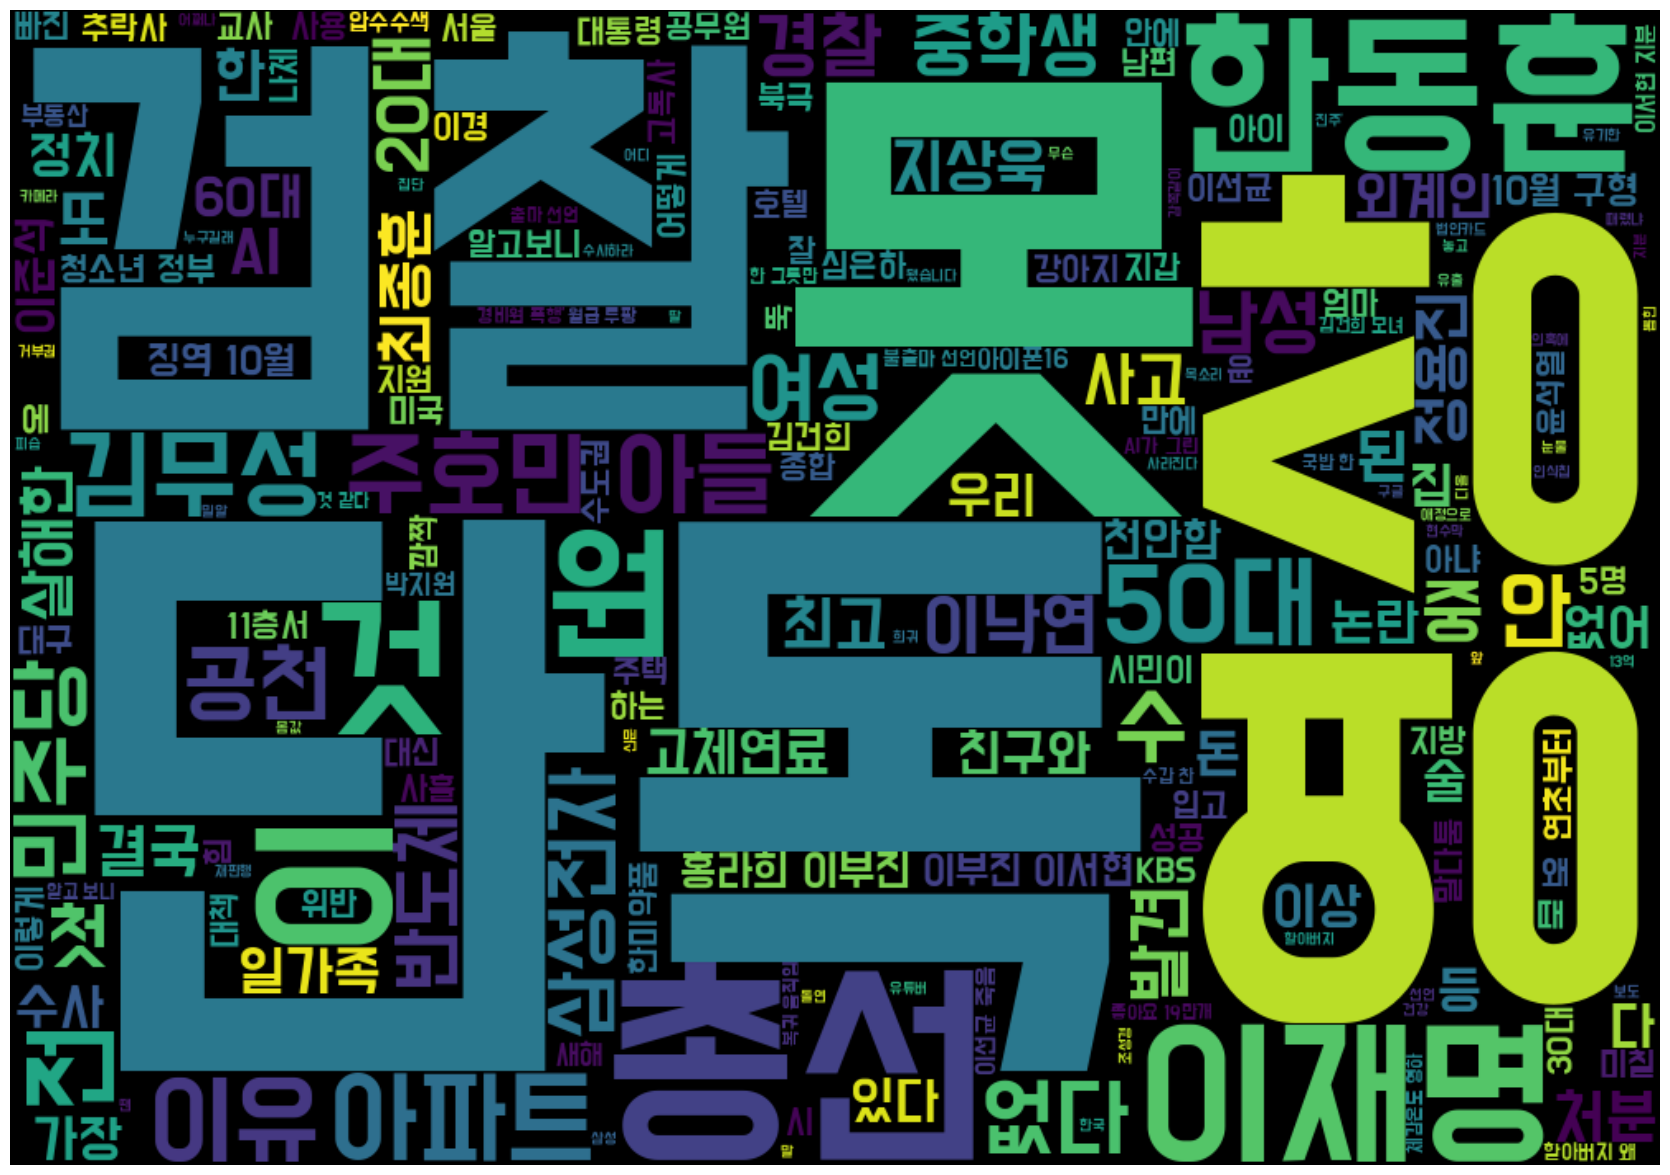

In [ ]:
# 한글 폰트 설정
font_path = '/content/BMDOHYEON_ttf.ttf'

plt.subplots(figsize=(25,15))

wordcloud = WordCloud(width=1000, height=700, font_path=font_path).generate(text)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##5 많이본 뉴스 VS 댓글이 많은 뉴스 시각화

### 댓글이 많은 뉴스 크롤링

In [ ]:
#1) 데이터 프레임 생성
re_data = pd.DataFrame(columns=['언론사명 ','순위','기사제목','기사링크','수집일자'])
#2) 네이버 언론사 별 랭킹 뉴스 url
url = 'https://news.naver.com/main/ranking/popularMemo.naver'

# 3) url에 접속하여 html 가져오기
html= urlopen(url)

# 4)html 파싱하여 변환
soup = BeautifulSoup(html, 'html.parser',from_encoding='UTF-8')


#5) 네이버 랭킹 정보가 들어있는 div class -> rankingnews_box 가져오기
div = soup.find_all('div', {'class':'rankingnews_box'})

#6) 네이버 랭킹 기사 제목, 언론사 등 데이터 크롤링
for index_div in range(0, len(div)):

  #언론사 추출
  strong = div[index_div].find('strong',{'class': 'rankingnews_name'})
  press = strong.text

  # 5개 순위 기사 정보 추출
  ul = div[index_div].find_all('ul',{'class': 'rankingnews_list'})

  for index_r in range(0, len(ul)):
    li= ul[index_r].find_all('li')

    for index_l in range(0, len(li)):
      try: #예외
        rank = li[index_l].find('em',{'class' : 'list_ranking_num'}).text #순위
        title = li[index_l].find('a').text #기사 제목
        link = li[index_l].find('a').attrs['href'] #기사 링크

        re_data = re_data.append({'언론사명' :press, '순위':rank, '기사제목':title, '기사링크':link,
                            '수집일자' : datetime.datetime.now(timezone('Asia/Seoul')).strftime('%Y-%m-%d %H:%M:%S')},
                            ignore_index=True)
      except:
        pass

      print('Complets of ' + rank + ' : ' + title)

print('-' * 20)
print(re_data)

Complets of 1 : '정준영 단톡방' 최종훈, 복귀 움직임…日 커뮤니티에 '인사'
Complets of 2 : 검찰, 변협에 이재명 징계 신청
Complets of 3 : [단독] ‘수원은 무조건 탈환’ 정용진, 트레이더스 수원화서점 찾았다
Complets of 4 : “우린 제 값 주고 사는데” 아이폰, 중국만 10만원 파격 할인…해도 너무해?
Complets of 5 : “박수홍만 법인카드 못 쓰게 했다…가족들이 더 써야 하니까”
Complets of 1 : 마트서 여성 허리춤 잡고 질질…'불륜 스캔들' 김제시의원 깜짝
Complets of 2 : '집단 성폭행' 최종훈 "보여드리겠다"…5년 만에 복귀 움직임
Complets of 3 : "보복운전 억울하다"는 이경, 기소의견 낸 경찰 2명 고소했다
Complets of 4 : "나체 영상 뿌린다" 여대생 협박해 1000만원 갈취…고3이었다
Complets of 5 : 박민영 "다 지겹다"…전 연인 강종현 돈 2.5억 수수설에 한 말
Complets of 1 : “차에 손대면 불 지를 것” 주차딱지 붙였다고 차단기 입구 막아버린 SUV 차주
Complets of 2 : 힘 못 쓰는 이순신과 외계인…한국영화 ‘반짝’ 훈풍에 그쳐 [뉴스+]
Complets of 3 : ‘호텔 수영장 빠져 뇌사’ 5살, 1년 치료 끝에 결국 숨져
Complets of 4 : 4억 슈퍼카에 장바구니 올린 할머니…차주 “정말 미칠 것 같다”
Complets of 5 : 한동훈 “우리 당, 민주당보다 훨씬 진보적”… 정치개혁 드라이브
Complets of 1 : 윤대통령, 반도체 산업 육성 총력전 공언…"대기업 퍼주기 아냐"
Complets of 2 : 주호민 아들 사건 쟁점된 녹음파일…검찰, 교사에 징역 10월 구형
Complets of 3 : 닷새 만에 1천억원 손실…홍콩 ELS 사태 일파만파
Complets of 4 : [단독] 시민이 주운 지갑 안에 중독성 강한 마약이…지갑 주인 구속
Complets of 5 : 중국

In [ ]:
re_data.head()

,언론사명,순위,기사제목,기사링크,수집일자,언론사명
0,NaN,1,"'정준영 단톡방' 최종훈, 복귀 움직임…日 커뮤니티에 '인사'",https://n.news.naver.com/article/016/000225250...,2024-01-15 22:53:27,헤럴드경제
1,NaN,2,"검찰, 변협에 이재명 징계 신청",https://n.news.naver.com/article/016/000225243...,2024-01-15 22:53:27,헤럴드경제
2,NaN,3,"[단독] ‘수원은 무조건 탈환’ 정용진, 트레이더스 수원화서점 찾았다",https://n.news.naver.com/article/016/000225242...,2024-01-15 22:53:27,헤럴드경제
3,NaN,4,"“우린 제 값 주고 사는데” 아이폰, 중국만 10만원 파격 할인…해도 너무해?",https://n.news.naver.com/article/016/000225251...,2024-01-15 22:53:27,헤럴드경제
4,NaN,5,“박수홍만 법인카드 못 쓰게 했다…가족들이 더 써야 하니까”,https://n.news.naver.com/article/016/000225247...,2024-01-15 22:53:27,헤럴드경제


### 워드 클라우드를 위한 전처리

In [ ]:
# 기사 제목만 text로 변환
re_text= ' '.join(li for li in re_data['기사제목'].astype(str))
re_text

'\'정준영 단톡방\' 최종훈, 복귀 움직임…日 커뮤니티에 \'인사\' 검찰, 변협에 이재명 징계 신청 [단독] ‘수원은 무조건 탈환’ 정용진, 트레이더스 수원화서점 찾았다 “우린 제 값 주고 사는데” 아이폰, 중국만 10만원 파격 할인…해도 너무해? “박수홍만 법인카드 못 쓰게 했다…가족들이 더 써야 하니까” 마트서 여성 허리춤 잡고 질질…\'불륜 스캔들\' 김제시의원 깜짝 \'집단 성폭행\' 최종훈 "보여드리겠다"…5년 만에 복귀 움직임 "보복운전 억울하다"는 이경, 기소의견 낸 경찰 2명 고소했다 "나체 영상 뿌린다" 여대생 협박해 1000만원 갈취…고3이었다 박민영 "다 지겹다"…전 연인 강종현 돈 2.5억 수수설에 한 말 “차에 손대면 불 지를 것” 주차딱지 붙였다고 차단기 입구 막아버린 SUV 차주 힘 못 쓰는 이순신과 외계인…한국영화 ‘반짝’ 훈풍에 그쳐 [뉴스+] ‘호텔 수영장 빠져 뇌사’ 5살, 1년 치료 끝에 결국 숨져 4억 슈퍼카에 장바구니 올린 할머니…차주 “정말 미칠 것 같다” 한동훈 “우리 당, 민주당보다 훨씬 진보적”… 정치개혁 드라이브 윤대통령, 반도체 산업 육성 총력전 공언…"대기업 퍼주기 아냐" 주호민 아들 사건 쟁점된 녹음파일…검찰, 교사에 징역 10월 구형 닷새 만에 1천억원 손실…홍콩 ELS 사태 일파만파 [단독] 시민이 주운 지갑 안에 중독성 강한 마약이…지갑 주인 구속 중국, 북한 고체연료 IRBM 발사에 "대화로 평화 지켜야" \'김건희 모녀 23억\' 檢 문서 파장‥"특검 재고?" 한동훈에게 묻자‥ [현장영상] "반도체로 일자리 창출‥600조 규모 산업단지 조성" "특권포기 수용하라" 野 압박에‥"\'받을 테니 특검도\' 한다면?" 김무성, 총선 부산 출마 공식 선언‥"후배들이 못해서 나왔다" 태안 일가족 비극 부른 1형 당뇨‥"중증질환으로 인정해 달라" “홍라희·이부진·이서현, 지분 2조1691억원 처분” ‘보복운전 벌금형’ 이경 “기소의견 경찰 2명 고소...민주당 공천 기준 뭐냐” “월급 루팡” 양주시 ‘발칵’

### 워드 클라우드

In [ ]:
re_wordcloud = WordCloud(width=1000, height=700, font_path=font_path).generate(re_text)

### 많이본 뉴스 vs 댓글이 많은 뉴스 시각화

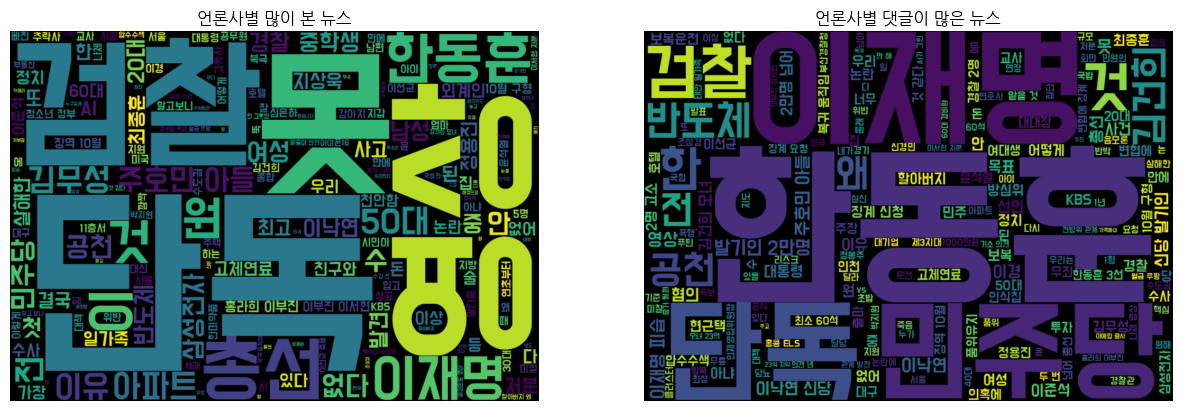

In [ ]:
fig = plt.figure(figsize=(15,5)) ##판
rows=1
cols =2 ##한줄에 2개

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.set_title('언론사별 많이 본 뉴스')
ax1.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(re_wordcloud, interpolation='bilinear')
ax2.set_title('언론사별 댓글이 많은 뉴스')
ax2.axis('off')

plt.show()